In [1]:
import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

C:\Users\e.lavrova\AppData\Local\Continuum\anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
import glob

In [8]:
pet_filenames = glob.glob("Z:/Lisa/Course_demo/OAS*/*_pet.nii.gz")
t1w_filenames = glob.glob("Z:/Lisa/Course_demo/OAS*/*_T1w.nii.gz")

In [9]:
len(pet_filenames), len(t1w_filenames)

(40, 40)

In [10]:
for pet_filename, t1w_filename in zip(pet_filenames, t1w_filenames):
    
    pet_nii = nib.load(pet_filename)
    pet = pet_nii.get_fdata()
    
    head, tail = os.path.split(pet_filename)

    t1w_nii = nib.load(t1w_filename)
    t1w = t1w_nii.get_fdata()

    new_header = header=pet_nii.header.copy()

    new_header['dim'][0] = 3
    new_header['dim'][4] = 1
    new_header['pixdim'][0] = 1
    new_header['pixdim'][4] = 1
    new_header['qoffset_x'] = t1w_nii.header['qoffset_x']
    new_header['qoffset_y'] = t1w_nii.header['qoffset_y']
    new_header['qoffset_z'] = t1w_nii.header['qoffset_z']

    new_header['srow_x'][3] = new_header['qoffset_x']
    new_header['srow_y'][3] = new_header['qoffset_y']
    new_header['srow_z'][3] = new_header['qoffset_z']

    new_header['srow_x'][0] = abs(new_header['srow_x'][0])
    new_header['srow_y'][1] = abs(new_header['srow_y'][1])
    new_header['srow_z'][2] = abs(new_header['srow_z'][2])

    new_img = nib.nifti1.Nifti1Image(np.mean(pet, axis=3), None, header=new_header)
    nib.save(new_img, os.path.join(head, 'pet_mean.nii'))

KeyboardInterrupt: 

In [53]:
pet_nii = nib.load(r"C:\Users\e.lavrova\Desktop\sub-OAS30001\sub-OAS30001_ses-d2438_acq-PIB_pet.nii")
pet = pet_nii.get_fdata()

t1w_nii = nib.load(r"C:\Users\e.lavrova\Desktop\sub-OAS30001\sub-OAS30001_sess-d2430_T1w.nii")
t1w = t1w_nii.get_fdata()

new_header = header=pet_nii.header.copy()

new_header['dim'][0] = 3
new_header['dim'][4] = 1
new_header['pixdim'][0] = 1
new_header['pixdim'][4] = 1
new_header['qoffset_x'] = t1w_nii.header['qoffset_x']
new_header['qoffset_y'] = t1w_nii.header['qoffset_y']
new_header['qoffset_z'] = t1w_nii.header['qoffset_z']

new_header['srow_x'][3] = new_header['qoffset_x']
new_header['srow_y'][3] = new_header['qoffset_y']
new_header['srow_z'][3] = new_header['qoffset_z']

new_header['srow_x'][0] = abs(new_header['srow_x'][0])
new_header['srow_y'][1] = abs(new_header['srow_y'][1])
new_header['srow_z'][2] = abs(new_header['srow_z'][2])

new_img = nib.nifti1.Nifti1Image(np.mean(pet, axis=3), None, header=new_header)
nib.save(new_img, "C:/Users/e.lavrova/Desktop/sub-OAS30001/sub-OAS30001_ses-d2438_acq-PIB_pet_mean.nii")

In [21]:
t1w_name = r"C:\Users\e.lavrova\Desktop\sub-OAS30001\sub-OAS30001_sess-d2430_T1w.nii"
t2w_name = r"C:\Users\e.lavrova\Desktop\sub-OAS30001\rsub-OAS30001_sess-d2430_acq-TSE_T2w.nii"
flair_name = r"C:\Users\e.lavrova\Desktop\sub-OAS30001\rsub-OAS30001_sess-d2430_FLAIR.nii"
pet_name = r"C:\Users\e.lavrova\Desktop\sub-OAS30001\rsub-OAS30001_ses-d2438_acq-PIB_pet_mean.nii"
mask_name = r"C:\Users\e.lavrova\Desktop\sub-OAS30001\c1sub-OAS30001_sess-d2430_T1w.nii"

In [22]:
t1w_nii = nib.load(t1w_name)
t2w_nii = nib.load(t2w_name)
flair_nii = nib.load(flair_name)
pet_nii = nib.load(pet_name)
mask_nii = nib.load(mask_name)

In [23]:
t1w_nii.header['dim'], t2w_nii.header['dim'], flair_nii.header['dim'], pet_nii.header['dim'], mask_nii.header['dim']

(array([  3, 176, 240, 256,   1,   0,   0,   0], dtype=int16),
 array([  3, 176, 240, 256,   1,   1,   1,   1], dtype=int16),
 array([  3, 176, 240, 256,   1,   1,   1,   1], dtype=int16),
 array([  3, 176, 240, 256,   1,   1,   1,   1], dtype=int16),
 array([  3, 176, 240, 256,   1,   1,   1,   1], dtype=int16))

In [24]:
pet = pet_nii.get_fdata()
pet[np.isnan(pet)] = 0
pet_fixed_nii = nib.Nifti1Image(pet, pet_nii.affine)

In [25]:
from nibabel.processing import resample_to_output

In [26]:
t1w_nii_1mm = resample_to_output(t1w_nii, voxel_sizes=[1,1,1])
t2w_nii_1mm = resample_to_output(t2w_nii, voxel_sizes=[1,1,1])
flair_nii_1mm = resample_to_output(flair_nii, voxel_sizes=[1,1,1])
pet_nii_1mm = resample_to_output(pet_fixed_nii, voxel_sizes=[1,1,1])
mask_nii_1mm = resample_to_output(mask_nii, voxel_sizes=[1,1,1])

In [27]:
t1w_nii_1mm.header['dim'], t2w_nii_1mm.header['dim'], flair_nii_1mm.header['dim'], pet_nii_1mm.header['dim'], mask_nii_1mm.header['dim']

(array([  3, 212, 254, 270,   1,   1,   1,   1], dtype=int16),
 array([  3, 212, 254, 270,   1,   1,   1,   1], dtype=int16),
 array([  3, 212, 254, 270,   1,   1,   1,   1], dtype=int16),
 array([  3, 212, 254, 270,   1,   1,   1,   1], dtype=int16),
 array([  3, 212, 254, 270,   1,   1,   1,   1], dtype=int16))

In [28]:
t1w_1mm = t1w_nii_1mm.get_fdata()
t2w_1mm = t2w_nii_1mm.get_fdata()
flair_1mm = flair_nii_1mm.get_fdata()
pet_1mm = pet_nii_1mm.get_fdata()
mask_1mm = mask_nii_1mm.get_fdata()

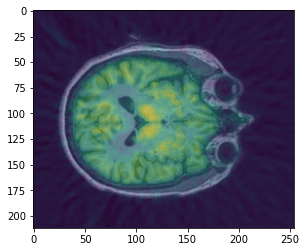

In [118]:
plt.imshow(t1w_1mm[..., 130], cmap='gray')
plt.imshow(pet_1mm[..., 130], cmap='viridis', alpha=0.5)
plt.show()

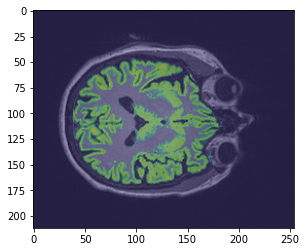

In [29]:
plt.imshow(t1w_1mm[..., 130], cmap='gray')
plt.imshow(mask_1mm[..., 130], cmap='viridis', alpha=0.5)
plt.show()

In [14]:
from radiomics import featureextractor
import SimpleITK as sitk

In [15]:
def extractFeatures(img, mask, norm=False):

    i = sitk.GetImageFromArray(img)
    m = sitk.GetImageFromArray(mask)
    f_v = {}

    settings = {}
    settings['preCrop'] = True
    settings['normalize'] = norm

    settings['binCount'] = 50
    settings['resampledPixelSpacing'] = None
    settings['interpolator'] = sitk.sitkBSpline

    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)

    extractor.addProvenance(False)
    extractor.enableAllFeatures()

    extracted_ftrs = extractor.execute(i, m)
    
    f = []
    v = []

    for key, value in extracted_ftrs.items():
        f_v[key] = value

    return f_v

In [16]:
def createHeader():
    
    # creates dataset header for extractFeatures extractor
    
    # input:
    # void
    
    # output:
    # list: ['sub', '{feature_0}', '{feature_1}', ..., '{feature_N}']
    
    f = {'sub': ''}
    i_t = np.ones((2, 2, 2))
    m_t = np.zeros((2, 2, 2))
    m_t[0, 0, 0] = 1
    m_t[1, 1, 1] = 1
    f.update(extractFeatures(i_t, m_t))

    return list(f.keys())

In [33]:
f_v_t1w = extractFeatures(t1w_1mm, mask_1mm, norm=True)
f_v_t2w = extractFeatures(t2w_1mm, mask_1mm, norm=True)
f_v_flair = extractFeatures(flair_1mm, mask_1mm, norm=True)

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [17]:
from nilearn.image import resample_img

In [18]:
pet_mask_name = r"C:\Users\e.lavrova\Desktop\Yeo_JNeurophysiol11_MNI152\Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii"
pet_mask_nii = nib.load(pet_mask_name)
pet_mask = pet_mask_nii.get_fdata()

pet_mni_name = r"C:\Users\e.lavrova\Desktop\sub-OAS30001\wrsub-OAS30001_ses-d2438_acq-PIB_pet_mean.nii"
pet_mni_nii = nib.load(pet_mni_name)
pet_mni = pet_mni_nii.get_fdata()

In [19]:
pet_mask.shape, pet_mni.shape

((256, 256, 256, 1), (157, 189, 156))

In [28]:
mask_res_nii = resample_img(pet_mask_nii, target_affine=img_nii.affine, target_shape=img.shape, interpolation='nearest')
mask_res = mask_res_nii.get_fdata()[..., 0]

In [21]:
mask_res_nii.shape, pet_mni.shape

((157, 189, 156, 1), (157, 189, 156))

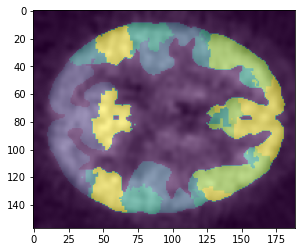

In [23]:
plt.imshow(pet_mni[..., 90], cmap='gray')
plt.imshow(mask_res[..., 90], cmap='viridis', alpha=0.5)
plt.show()

In [14]:
f_1, v_1 = extractFeatures(pet_mni, (mask_res==1).astype(np.uint8), norm=False)
f_2, v_2 = extractFeatures(pet_mni, (mask_res==2).astype(np.uint8), norm=False)
f_3, v_3 = extractFeatures(pet_mni, (mask_res==3).astype(np.uint8), norm=False)
f_4, v_4 = extractFeatures(pet_mni, (mask_res==4).astype(np.uint8), norm=False)
f_5, v_5 = extractFeatures(pet_mni, (mask_res==5).astype(np.uint8), norm=False)
f_6, v_6 = extractFeatures(pet_mni, (mask_res==6).astype(np.uint8), norm=False)
f_7, v_7 = extractFeatures(pet_mni, (mask_res==7).astype(np.uint8), norm=False)

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
F

In [1]:
import os
import shutil

In [2]:
rootdirname = r"Z:\Lisa\Course_demo"

In [37]:
for item in os.listdir(rootdirname):
    dirname = os.path.join(rootdirname, item)
    print (dirname)
    for path, subdirs, files in os.walk(dirname):
        for filename in files:
            filepath = os.path.join(path, filename)
            os.rename(filepath, os.path.join(dirname, filename))


Z:\Lisa\Course_demo\OAS30002_AV45_d2340
Z:\Lisa\Course_demo\OAS30002_MR_d2340
Z:\Lisa\Course_demo\OAS30003_AV45_d3731
Z:\Lisa\Course_demo\OAS30003_MR_d3731
Z:\Lisa\Course_demo\OAS30005_AV45_d3453
Z:\Lisa\Course_demo\OAS30005_MR_d3453
Z:\Lisa\Course_demo\OAS30006_AV45_d2342
Z:\Lisa\Course_demo\OAS30006_MR_d2342
Z:\Lisa\Course_demo\OAS30007_AV45_d1636
Z:\Lisa\Course_demo\OAS30007_MR_d1636
Z:\Lisa\Course_demo\OAS30010_AV45_d0068
Z:\Lisa\Course_demo\OAS30010_MR_d0068
Z:\Lisa\Course_demo\OAS30013_AV45_d0102
Z:\Lisa\Course_demo\OAS30013_MR_d0102
Z:\Lisa\Course_demo\OAS30025_AV45_d2298
Z:\Lisa\Course_demo\OAS30025_MR_d2298
Z:\Lisa\Course_demo\OAS30026_AV45_d0696
Z:\Lisa\Course_demo\OAS30026_MR_d0696
Z:\Lisa\Course_demo\OAS30028_AV45_d1847
Z:\Lisa\Course_demo\OAS30028_MR_d1847
Z:\Lisa\Course_demo\OAS30039_AV45_d0103
Z:\Lisa\Course_demo\OAS30039_MR_d0103
Z:\Lisa\Course_demo\OAS30042_AV45_d0067
Z:\Lisa\Course_demo\OAS30042_MR_d0067
Z:\Lisa\Course_demo\OAS30044_AV45_d1319
Z:\Lisa\Course_demo\OAS3

In [25]:
import csv

In [27]:
img.shape

(79, 95, 79)

In [36]:
dirname = r"C:\Users\e.lavrova\Desktop\Course_demo"
h = createHeader()

csv_file = open('C:/Users/e.lavrova/Desktop/features_3.csv', 'w')
writer = csv.DictWriter(csv_file, fieldnames = h, lineterminator='\n')
writer.writeheader()

for item in os.listdir(dirname):
    
    img_name = os.path.join(dirname, item + '/wrpet_mean.nii')
    img_nii = nib.load(img_name)
    img = img_nii.get_fdata()
    
    f_sub = {'sub': item[:8]}
    f_sub.update(extractFeatures(img, (mask_res==3).astype(np.uint8)))
    writer.writerow(f_sub)
    
csv_file.close()
    

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
F

In [32]:
dirname = r"C:\Users\e.lavrova\Desktop\Course_demo"
h = createHeader()

csv_file = open('C:/Users/e.lavrova/Desktop/features_4.csv', 'w')
writer = csv.DictWriter(csv_file, fieldnames = h, lineterminator='\n')
writer.writeheader()

for item in os.listdir(dirname):
    
    img_name = os.path.join(dirname, item + '/wrpet_mean.nii')
    img_nii = nib.load(img_name)
    img = img_nii.get_fdata()
    
    f_sub = {'sub': item[:8]}
    f_sub.update(extractFeatures(img, (mask_res==4).astype(np.uint8)))
    writer.writerow(f_sub)
    
csv_file.close()

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
F

In [33]:
dirname = r"C:\Users\e.lavrova\Desktop\Course_demo"
h = createHeader()

csv_file = open('C:/Users/e.lavrova/Desktop/features_5.csv', 'w')
writer = csv.DictWriter(csv_file, fieldnames = h, lineterminator='\n')
writer.writeheader()

for item in os.listdir(dirname):
    
    img_name = os.path.join(dirname, item + '/wrpet_mean.nii')
    img_nii = nib.load(img_name)
    img = img_nii.get_fdata()
    
    f_sub = {'sub': item[:8]}
    f_sub.update(extractFeatures(img, (mask_res==5).astype(np.uint8)))
    writer.writerow(f_sub)
    
csv_file.close()

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
F

In [34]:
dirname = r"C:\Users\e.lavrova\Desktop\Course_demo"
h = createHeader()

csv_file = open('C:/Users/e.lavrova/Desktop/features_6.csv', 'w')
writer = csv.DictWriter(csv_file, fieldnames = h, lineterminator='\n')
writer.writeheader()

for item in os.listdir(dirname):
    
    img_name = os.path.join(dirname, item + '/wrpet_mean.nii')
    img_nii = nib.load(img_name)
    img = img_nii.get_fdata()
    
    f_sub = {'sub': item[:8]}
    f_sub.update(extractFeatures(img, (mask_res==6).astype(np.uint8)))
    writer.writerow(f_sub)
    
csv_file.close()

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
F

In [35]:
dirname = r"C:\Users\e.lavrova\Desktop\Course_demo"
h = createHeader()

csv_file = open('C:/Users/e.lavrova/Desktop/features_7.csv', 'w')
writer = csv.DictWriter(csv_file, fieldnames = h, lineterminator='\n')
writer.writeheader()

for item in os.listdir(dirname):
    
    img_name = os.path.join(dirname, item + '/wrpet_mean.nii')
    img_nii = nib.load(img_name)
    img = img_nii.get_fdata()
    
    f_sub = {'sub': item[:8]}
    f_sub.update(extractFeatures(img, (mask_res==7).astype(np.uint8)))
    writer.writerow(f_sub)
    
csv_file.close()

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
F